<a href="https://colab.research.google.com/github/Jcnok/digitalinnovationone/blob/main/Unimed-BH%20-%20Ci%C3%AAncia%20de%20Dados/Projeto_ML_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Machine Learning sobre a Covid-19
[kaggle datasets]('https://www.kaggle.com/datasets/sudalairajkumar/novel-corona-virus-2019-dataset')

* Coronavirus é um vírus Pandêmico de doença respiratória detectado pela primeira vez em Wuhan, China em 2019.
* Este conjunto de dados tem informações diárias sobre o número de casos afetados, mortes e recuperação do novo coronavírus de 2019. Observe que são dados de série temporal e, portanto, o número de casos em um determinado dia é o número cumulativo.
* Os dados estão disponíveis a partir de 22 de janeiro de 2020.


## Objetivo de estudo:

* Demonstrar todo o conhecimento adquirido durante o bootcamp;
* Criar um EDA - Análise Exploratória de dados;
* Criar modelos de predições afim de projetar o crescimento de casos futuros utiliando as técnicas de ML abordas.

## Descrição das colunas:

* SNo - Número de série.
* ObservationDate - Data da observação em MM/DD/AAAA.
* Province/State  - Província ou estado da observação (Pode estar vazio quando faltar).
* Country/Region	- País/Região de observação.
* Last Update - Hora em UTC em que a linha é atualizada para a província ou país especificado.
* Confirmed - Número acumulado de casos confirmados.
* Deaths - Número acumulado de óbitos.
* Recovered - Número acumulado de casos recuperados.

## Carregando os dados:

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import re
import warnings
warnings.filterwarnings("ignore")
import missingno as missing

In [3]:
#Link da base de dados
url = 'https://raw.githubusercontent.com/Jcnok/digitalinnovationone/main/Unimed-BH%20-%20Ci%C3%AAncia%20de%20Dados/Datasets/covid_19_data.csv'

In [4]:
#carregando o dataframe
df = pd.read_csv(url, parse_dates=['ObservationDate','Last Update'])

In [5]:
# visualização das 5 primeiras linhas;
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


## Limpeza e Pré-processamento:

In [6]:
# Informções sobre o df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              26713 non-null  int64         
 1   ObservationDate  26713 non-null  datetime64[ns]
 2   Province/State   12882 non-null  object        
 3   Country/Region   26713 non-null  object        
 4   Last Update      26713 non-null  datetime64[ns]
 5   Confirmed        26713 non-null  float64       
 6   Deaths           26713 non-null  float64       
 7   Recovered        26713 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 1.6+ MB


* Aparentemente não temos dados nulos no df;
* Os tipos estão dentro das conformidades de cada coluna;
* Temos um total de 26.712 registros;
* Vamos apenas padronizar o formato do nome das colunas;

In [7]:
#Função para corrigir o nome das colunas;
def alter_col(col_name):
  # substituir caracteres especiais e alterar todas as letras para minuscúlas.
  return re.sub(r"[/| ]","", col_name).lower()


In [8]:
#aplicando a função no df
df.columns = [alter_col(col) for col in df.columns]

In [9]:
#Verificando se as colunas foram alteradas;
df.head()

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [10]:
# Exibindo os valores que são únicos de cada feature.
print("Valores únicos (por coluna):\n{}\n".format(df.nunique()))

Valores únicos (por coluna):
sno                26713
observationdate      119
provincestate        354
countryregion        223
lastupdate          1859
confirmed           6592
deaths              2100
recovered           3134
dtype: int64



In [11]:
#Convertendo os dados tipo de object para categóricos
df['provincestate'] = df['provincestate'].astype('category')
df['countryregion'] = df['countryregion'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   sno              26713 non-null  int64         
 1   observationdate  26713 non-null  datetime64[ns]
 2   provincestate    12882 non-null  category      
 3   countryregion    26713 non-null  category      
 4   lastupdate       26713 non-null  datetime64[ns]
 5   confirmed        26713 non-null  float64       
 6   deaths           26713 non-null  float64       
 7   recovered        26713 non-null  float64       
dtypes: category(2), datetime64[ns](2), float64(3), int64(1)
memory usage: 1.3 MB


## Análise Exploratória - Brazil

In [12]:
#Selecionando apenas o brazil a partir do primeiro caso confirmado.
df_br = df.query("countryregion == 'Brazil' and confirmed >= 1")
df_br

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


* Primeiro caso confirmado foi em 26/02/2020;
* Não há registros por estado(NaN);

In [13]:
# plotando um gráfico de linhas da evolução de casos confirmados;
px.line(df_br, 'observationdate', 'confirmed', title= 'Casos confirmados no Brazil')

![img](https://github.com/Jcnok/digitalinnovationone/blob/main/images/plot1.png?raw=true)

In [14]:
# Tecnica de programação funcional;
# criando uma nova coluna para computar a quantidade da casos diários.
df_br['newcases'] = list(map(
    lambda x: 0 if (x==0) else df_br['confirmed'].iloc[x] - df_br['confirmed'].iloc[x-1],
    np.arange(df_br.shape[0])
))

In [15]:
df_br

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,newcases
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0,17126.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0,13220.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0,7569.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0,14288.0


In [16]:
# Gráfico de linhas de novos casos diários do Brasil;
px.line(df_br, 'observationdate', 'newcases', title='Novos casos por dia do Brazil')

![img](https://github.com/Jcnok/digitalinnovationone/blob/main/images/plot2.png?raw=true)

In [17]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x=df_br.observationdate, y=df_br.deaths, name='Mortes',
               mode='lines+markers', line={'color':'darkmagenta'})
)
#layout
fig.update_layout(title='Mortes por COVID no Brasil')
fig.show()

![img](https://github.com/Jcnok/digitalinnovationone/blob/main/images/plot3.png?raw=true)

## Taxa de crescimento:
 * Fórmula > taxa de crescimento = (presente/passado)**(1/n) - 1

In [18]:
def taxa_crescimento(data,variable, data_inicio=None, data_fim=None):
  if data_inicio == None:
    data_inicio = data.observationdate.loc[data[variable] > 0].min()
  else:
    data_inicio = pd.to_datetime(data_inicio)
  if data_fim == None:
    data_fim = data.observationdate.iloc[-1]
  else:
    data_fim = pd.to_datetime(data_fim)
  # definindo os valores presente e passado;
  passado = data.loc[data.observationdate == data_inicio, variable].values[0]
  presente = data.loc[data.observationdate == data_fim, variable].values[0]
  # define o número de pontos no tempo que vamos avaliar
  n = (data_fim - data_inicio).days
  # Calcular a taxa
  taxa = (presente/passado)**(1/n) - 1
  return round((taxa * 100),2)

In [19]:
# verificando a taxa de crescimento médio e casos confirmados do brasil em todo período
tax_br = taxa_crescimento(df_br,'confirmed')
print(f"Entre os períodos de {df_br.observationdate.min()} a {df_br.observationdate.max()} tivemos um crescimento médio de {tax_br}% de casos confirmados.")


Entre os períodos de 2020-02-26 00:00:00 a 2020-05-19 00:00:00 tivemos um crescimento médio de 16.27% de casos confirmados.


In [20]:
# verificando a taxa de crescimento médio e casos confirmados do brasil em todo período
tax_br = taxa_crescimento(df_br,'deaths')
print(f"Entre os períodos de {df_br.observationdate.min()} a {df_br.observationdate.max()} tivemos um crescimento médio de {tax_br}% de mortes.")

Entre os períodos de 2020-02-26 00:00:00 a 2020-05-19 00:00:00 tivemos um crescimento médio de 16.83% de mortes.


In [21]:
# Taxa de crescimento no período de 7 dias:
def taxa_crescimento_dia(data,variable,data_inicio=None):
  if data_inicio == None:
    data_inicio = data.observationdate.loc[data[variable] > 0].min()
  else:
    data_inicio = pd.to_datetime(data_inicio)

  data_fim = data.observationdate.max()
  
  # define o número de pontos no tempo que vamos avaliar
  n = (data_fim - data_inicio).days
  # Calcular a taxa
  taxas = list(map(
      lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
      range(1,n+1)

  ))
  return np.array(taxas) * 100

In [22]:
taxa_dia = taxa_crescimento_dia(df_br,'confirmed')
primeiro_dia = df_br.observationdate.loc[df_br.confirmed > 0].min()
px.line(x=pd.date_range(primeiro_dia, df_br.observationdate.max())[1:], y=taxa_dia,title='Taxa de crescimento de casos confirmados por dia')

![img](https://github.com/Jcnok/digitalinnovationone/blob/main/images/plot4.png?raw=true)

# Machine Learning

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


In [24]:
confirmados = df_br.confirmed
confirmados.index = df_br.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [25]:
res = seasonal_decompose(confirmados)

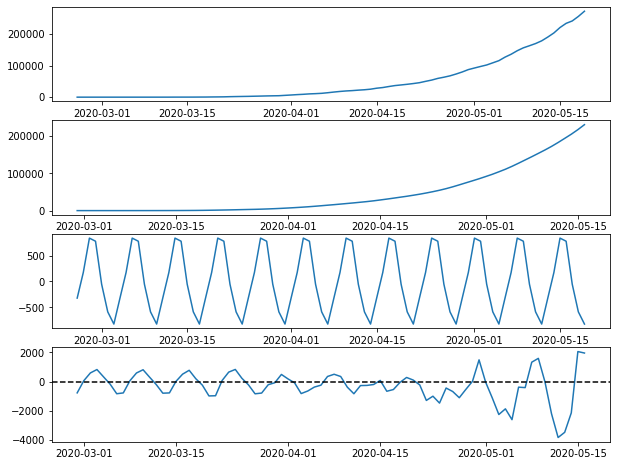

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0,linestyle='dashed', c='black')
plt.show()

# Modelo Arima - média móvel integrada auto regressiva.

In [87]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 37.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [27]:
from pmdarima.arima import auto_arima
modelo = auto_arima(confirmados)

In [29]:
fig = go.Figure(go.Scatter(
x = confirmados.index, y=confirmados, name ='Observados'
))
fig.add_trace(go.Scatter(
    x = confirmados.index, y=modelo.predict_in_sample(), name='Preditos'
))
fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), 
    name='Forecast'
))
fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias')
fig.show()

![img](https://github.com/Jcnok/digitalinnovationone/blob/main/images/plot5.png?raw=true)

* * O modelo nos deu uma estimativa de que os casos irão de 271Mil casos em 19/05/2020 para +-852mil em 19/16/2020.
* * Para os casos já ocorridos linha azul, o modelo conseguiu performar muito bem na predição(linha vermelha).
* * Quanto maior o período menor a performance do modelo, lembrando que estamos estimando o período de 30 dias.
* * Nesse caso irei carregar outro dataset com dados atuais para realizarmos uma breve comparação do quanto o modelo foi capaz de acompanhar a tendência.
* O dataset foi retirado do [kaggle](https://www.kaggle.com/datasets/unanimad/corona-virus-brazil?select=brazil_covid19.csv)

In [31]:
#Endereço do novo conjunto com dados atuais.
url_new = 'https://raw.githubusercontent.com/Jcnok/digitalinnovationone/main/Unimed-BH%20-%20Ci%C3%AAncia%20de%20Dados/Datasets/brazil_covid19.csv'

In [62]:
# Carregando o dataset.
df_novo_br = pd.read_csv(url_new, parse_dates=['date'])
df_novo_br.head()

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0.0,0
1,2020-02-25,Centro-Oeste,GO,0.0,0
2,2020-02-25,Centro-Oeste,MS,0.0,0
3,2020-02-25,Centro-Oeste,MT,0.0,0
4,2020-02-25,Nordeste,AL,0.0,0


In [64]:
#filtro para período até 19/06/2020 - pois o modelo realizou a predição até esse data.
df_filtro = df_novo_br.query('date <= "2020-06-19"')

In [65]:
# pegando a somatório de casos.
df_br_ok = df_filtro[['date', 'cases']].groupby('date').sum()

In [73]:
#verificando os dados.
df_br_ok.head()

,cases
date,
2020-02-25,0.0
2020-02-26,1.0
2020-02-27,1.0
2020-02-28,1.0
2020-02-29,2.0


In [72]:
# Criando um novo plot com os dados reais vs os dados preditos no período.
fig = go.Figure(go.Scatter(
    x=df_br_ok.index,y=df_br_ok.cases, name='Confirmados'
))
fig.add_trace(go.Scatter(
    x = confirmados.index, y=modelo.predict_in_sample(), name='Preditos'
))
fig.add_trace(go.Scatter(
    x=pd.date_range('2020-05-20', '2020-06-20'), y=modelo.predict(31), 
    name='Forecast'
))
fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias')
fig.show()

![img](https://github.com/Jcnok/digitalinnovationone/blob/main/images/plot6.png?raw=true)

* Podemos observar que o modelo performou os próximos 7 dias, e depois disso a linha verde da previsão começou a se distânciar da linha azul que são os casos reais confirmados.
* Conforme observado anteriormente, o modelo perde performance sendo necessário um re-treino em um período de no mínimo 7 dias para uma melhor acurácia.

## Modelo de Crescimento com Prophet

In [77]:
#Instalação do Prophet
!pip install pystan~=2.14
!pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 132 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638984 sha256=b02775590dab927f3d1451701ae79c112c34754db79ba5b4cd13716d69bd8451
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [82]:
confirmados.reset_index()[:-5]

,observationdate,confirmed
0,2020-02-26,1.0
1,2020-02-27,1.0
2,2020-02-28,1.0
3,2020-02-29,2.0
4,2020-03-01,2.0
...,...,...
74,2020-05-10,162699.0
75,2020-05-11,169594.0
76,2020-05-12,178214.0
77,2020-05-13,190137.0


In [78]:
#importação da biblioteca
from fbprophet import Prophet

In [138]:
# Preprocessamentos;
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]
# Necessário renomear as colunas;
train.rename(columns={'observationdate':'ds', 'confirmed':'y'}, inplace=True)
test.rename(columns={'observationdate':'ds', 'confirmed':'y'}, inplace=True)
# Definindo o modelo de 
# changepoints - lista com os dias que houveram muitas mudanças.
profeta = Prophet(growth='logistic',changepoints=['2020-03-21','2020-03-30','2020-04-25','2020-05-03','2020-05-10'])

#pop = 211463256 #projeção da população brasileira - ponto 
pop = 1500000
train['cap'] = pop # capacidade da população.

# treino do modelo
profeta.fit(train)

# Construir previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=40) #prevendo 200 dias;
future_dates['cap'] = pop
forecast = profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [139]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Treino'))
fig.add_trace(go.Scatter(x=test.ds, y=test.y, name='Teste'))
fig.update_layout(title="Predições da casos confirmados no Brasil")
fig.show()

![img](https://github.com/Jcnok/digitalinnovationone/blob/main/images/plot7.png?raw=true)

In [140]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=df_br_ok.index,y=df_br_ok.cases, name='Confirmados'))
fig.update_layout(title="Predições da casos confirmados no Brasil")
fig.show()

![img](https://github.com/Jcnok/digitalinnovationone/blob/main/images/plot9.png?raw=true)

* aparentemente o Prophet performou melhor se comparado ao ARIMA.
* Vamos plotar o gráfico do período para confirmaçãol.


* Com uma população de 1,500.000 no dia 20/06/2020 nosso modelo iria atingir 1 milhão de casos confirmados, algo bem próximo do que realmente ocorreu.
